In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np
import os

/home/minhnq/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def save_pruning_size_graph(x, y1, y2, dir=""): # sparities_list, no_params_list, flops_list
    try:
        plt.style.use("ggplot")
    except:
        pass

    x, y1, y2= np.array(x), np.array(y1), np.array(y2)
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the pruned mAP and recovered mAP
    ax.set_xlabel('Channel sparsity')
    ax.set_ylabel('#Params (M)')
    ax.plot(x, y1, label='Remaining #params')
    ax.scatter(x, y1)

    # create a second axis that shares the same x-axis
    ax2 = ax.twinx()

    # plot the second set of data
    ax2.set_ylabel('FLOPs (G)')
    ax2.plot(x, y2, color='tab:blue', label='Remaining FLOPs')
    ax2.scatter(x, y2, color='tab:blue')

    # add a legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    ax.set_xlim(1, 0)
    ax.set_ylim(0, max(y1) + 1.5)
    ax2.set_ylim(0, max(y2) + 1.5)

    plt.title('Comparison of FLOPs and #Params with Pruning Ratio')
    plt.show()
    # plt.savefig(os.path.join(dir, f'pruning_size_change.png'))

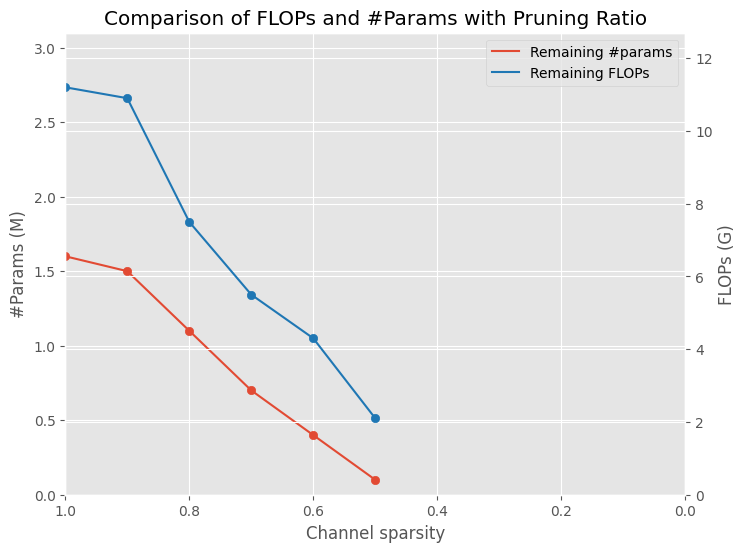

In [3]:
x = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
y1 = [1.6, 1.5, 1.1, 0.7, 0.4, 0.1]
y2 = [11.2, 10.9, 7.5, 5.5, 4.3, 2.1]

save_pruning_size_graph(x, y1, y2, dir="")